In [15]:
from __future__ import division

from math import sqrt, cos, sin, acos, pi, atan2
from matplotlib import cm
from matplotlib import patches
from matplotlib.colors import LogNorm
from matplotlib.path import Path
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import sphereml
from scipy.optimize import differential_evolution
from pyfde import JADE
%run algorithms/genetic.py
import cma
import lcmaes
from fitness_function import evaluate

import time
from joblib import Parallel, delayed
from persistence import save, load
import pyformulas as pf

factor=1.3					# area of plot

In [14]:
#limitsdict = {'r_limits':(10,120), 'm_limits':(3, 10), 'mj_limits':(0, 0.4)}
limitsdict = {'r_limits':(10,120), 'm_limits':(3, 10), 'mj_limits':(0, 0.0)}

def plot_hist(hist, label, linestyle='-'):
    histarr = np.array(hist)
    xs,ys = histarr[:,0],histarr[:,1]
    plt.plot(xs, ys, linestyle=linestyle, label=label)

In [28]:
%%time
def solve(r_limits, m_limits, mj_limits, layers, n_it):
    limits = [r_limits]*layers+[m_limits,mj_limits]*layers+[(0.1, r_limits[-1]*factor)]
    popsize = 5*len(limits)
    solver = JADE(lambda x: evaluate(x, layers=layers), n_dim=len(limits), n_pop=popsize, limits=limits)
    best, fit = solver.run(n_it=n_it/popsize)
    return best, fit

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [94]:
wl=455
math.pi*2/wl*120

1.6571038172781327

In [29]:
%%time
solve(layers=2, n_it=10000, **limitsdict)

CPU times: user 29.1 s, sys: 116 ms, total: 29.2 s
Wall time: 29 s


(array([119.95710203,  10.02350198,   9.07666776,   0.        ,
          9.92868632,   0.        ,  61.12218054]),
 10.882724075470765)

In [31]:
%%time

LAYERS=2
N_IT=20000 * 7 # 7 minutes
RUNS=5

limitsdict = {'m_limits':(3, 10), 'mj_limits':(0, 0.0)}

res = []
for max_r in [120, 140, 160, 200, 250, 350, 500, 700]:
    for run in range(RUNS):
        best, fit = solve(layers=LAYERS, n_it=N_IT, r_limits=(10, max_r), **limitsdict)
        res.append((best, fit))
res = np.array(res)
save(res, f"results/jade/different_sizes")

CPU times: user 4h 32min 35s, sys: 21.2 s, total: 4h 32min 56s
Wall time: 4h 31min 30s


In [85]:
res[13][1]

16.548310629490963

In [106]:
xs = list(map(lambda x: max(x[0][0], x[0][1])*math.pi*2/wl, res))
ys = list(map(lambda x: x[1], res))

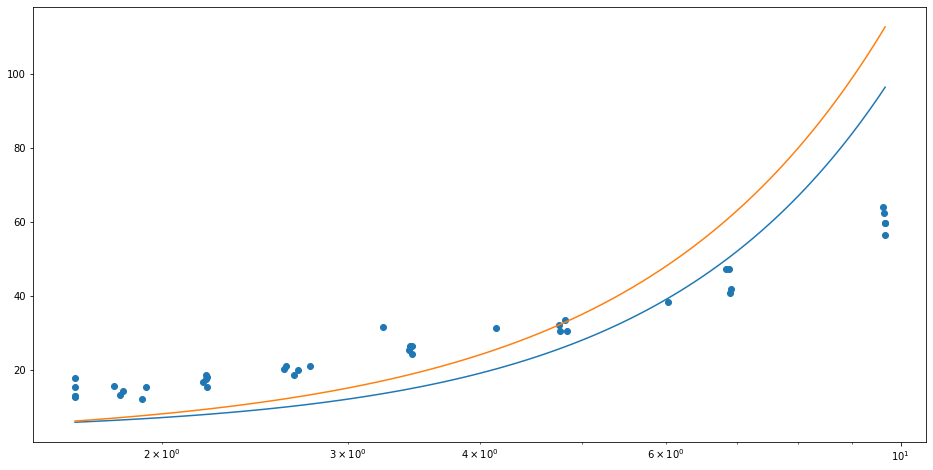

In [111]:
plt.figure(figsize=(16,8))
plt.scatter(x=xs, y=ys);
plt.plot(np.linspace(xs[0], xs[-1], 100), np.linspace(xs[0], xs[-1], 100)**2+3);
plt.plot(np.linspace(xs[0], xs[-1], 100), np.linspace(xs[0], xs[-1], 100)**2+2*np.linspace(xs[0], xs[-1], 100));
plt.xscale('log')
#plt.legend();